<H1> Metro Data Set

<h2> Loading the data

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

metro = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

metro

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


0. **holiday**: if the day is a holiday or not
1. **temp**: temperature in kelvin
2. **raing_1h**: amount of rain in 1 hour
3. **snow_1h**: amount of snow in 1 hour
4. **clouds_all**: cloud concentration
5. **weather_main**: a short weather description
6. **weather_description**: a more accurate and long weather description
7. **date_time**: date and hour of the report
8. **traffic_volume**: amount of people using the metro

!PROSOXI BROOO!<BR>temp -> Celsius<br>Keep weather main for regression<br>check regression with AND without year in date_time<br>

<h2> Cleaning and preparing the data

In [2]:
#Clean null values

metro = metro.dropna()

In [3]:
#dropping weather_main and weather_condition

metro = metro.drop(['weather_description'], axis=1)

In [4]:
#non-holiday -> 0
#holiday -> 1

metro['holiday'] = [0 if x == 'None' else 1 for x in metro['holiday']]

In [5]:
#fixing the date as month_day and hour seperately with no special/white characters 

metro['date'] = metro['date_time'].str.replace('-', '')
metro['date'] = metro['date'].str.replace(' ', '')
metro['hour'] = metro['date'].str[8:10]
metro['date'] = metro['date'].str[0:8]
metro['hour'] = metro['hour'].astype(int)
metro['date'] = metro['date'].astype(int)

In [6]:
#fixing weather_main dataframe

#Clouds: 0
#Clear: 1
#Rain: 2
#Drizzle: 3
#Mist: 4
#Haze: 5
#Fog: 6
#Thunderstorm: 7
#Snow: 8
#Squall: 9
#Smoke: 10

temp = metro.weather_main.unique()
j = 0
keys = []
values = []
for index in temp:
    keys.append(j)
    values.append(index)
    j = j + 1
dictionary = dict(zip(values, keys))
dictionary
metro = metro.replace(to_replace = {'weather_main' : dictionary})

In [7]:
#converting kelvin to celcius degrees

metro['temp'] = metro['temp'] - 272.15

<h1> Datagrams

In [226]:
metro

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume,date,hour
0,0,16.13,0.0,0.0,40,0,2012-10-02 09:00:00,5545,20121002,9
1,0,17.21,0.0,0.0,75,0,2012-10-02 10:00:00,4516,20121002,10
2,0,17.43,0.0,0.0,90,0,2012-10-02 11:00:00,4767,20121002,11
3,0,17.98,0.0,0.0,90,0,2012-10-02 12:00:00,5026,20121002,12
4,0,18.99,0.0,0.0,75,0,2012-10-02 13:00:00,4918,20121002,13
...,...,...,...,...,...,...,...,...,...,...
48199,0,11.30,0.0,0.0,75,0,2018-09-30 19:00:00,3543,20180930,19
48200,0,10.61,0.0,0.0,90,0,2018-09-30 20:00:00,2781,20180930,20
48201,0,10.58,0.0,0.0,90,7,2018-09-30 21:00:00,2159,20180930,21
48202,0,9.94,0.0,0.0,90,0,2018-09-30 22:00:00,1450,20180930,22


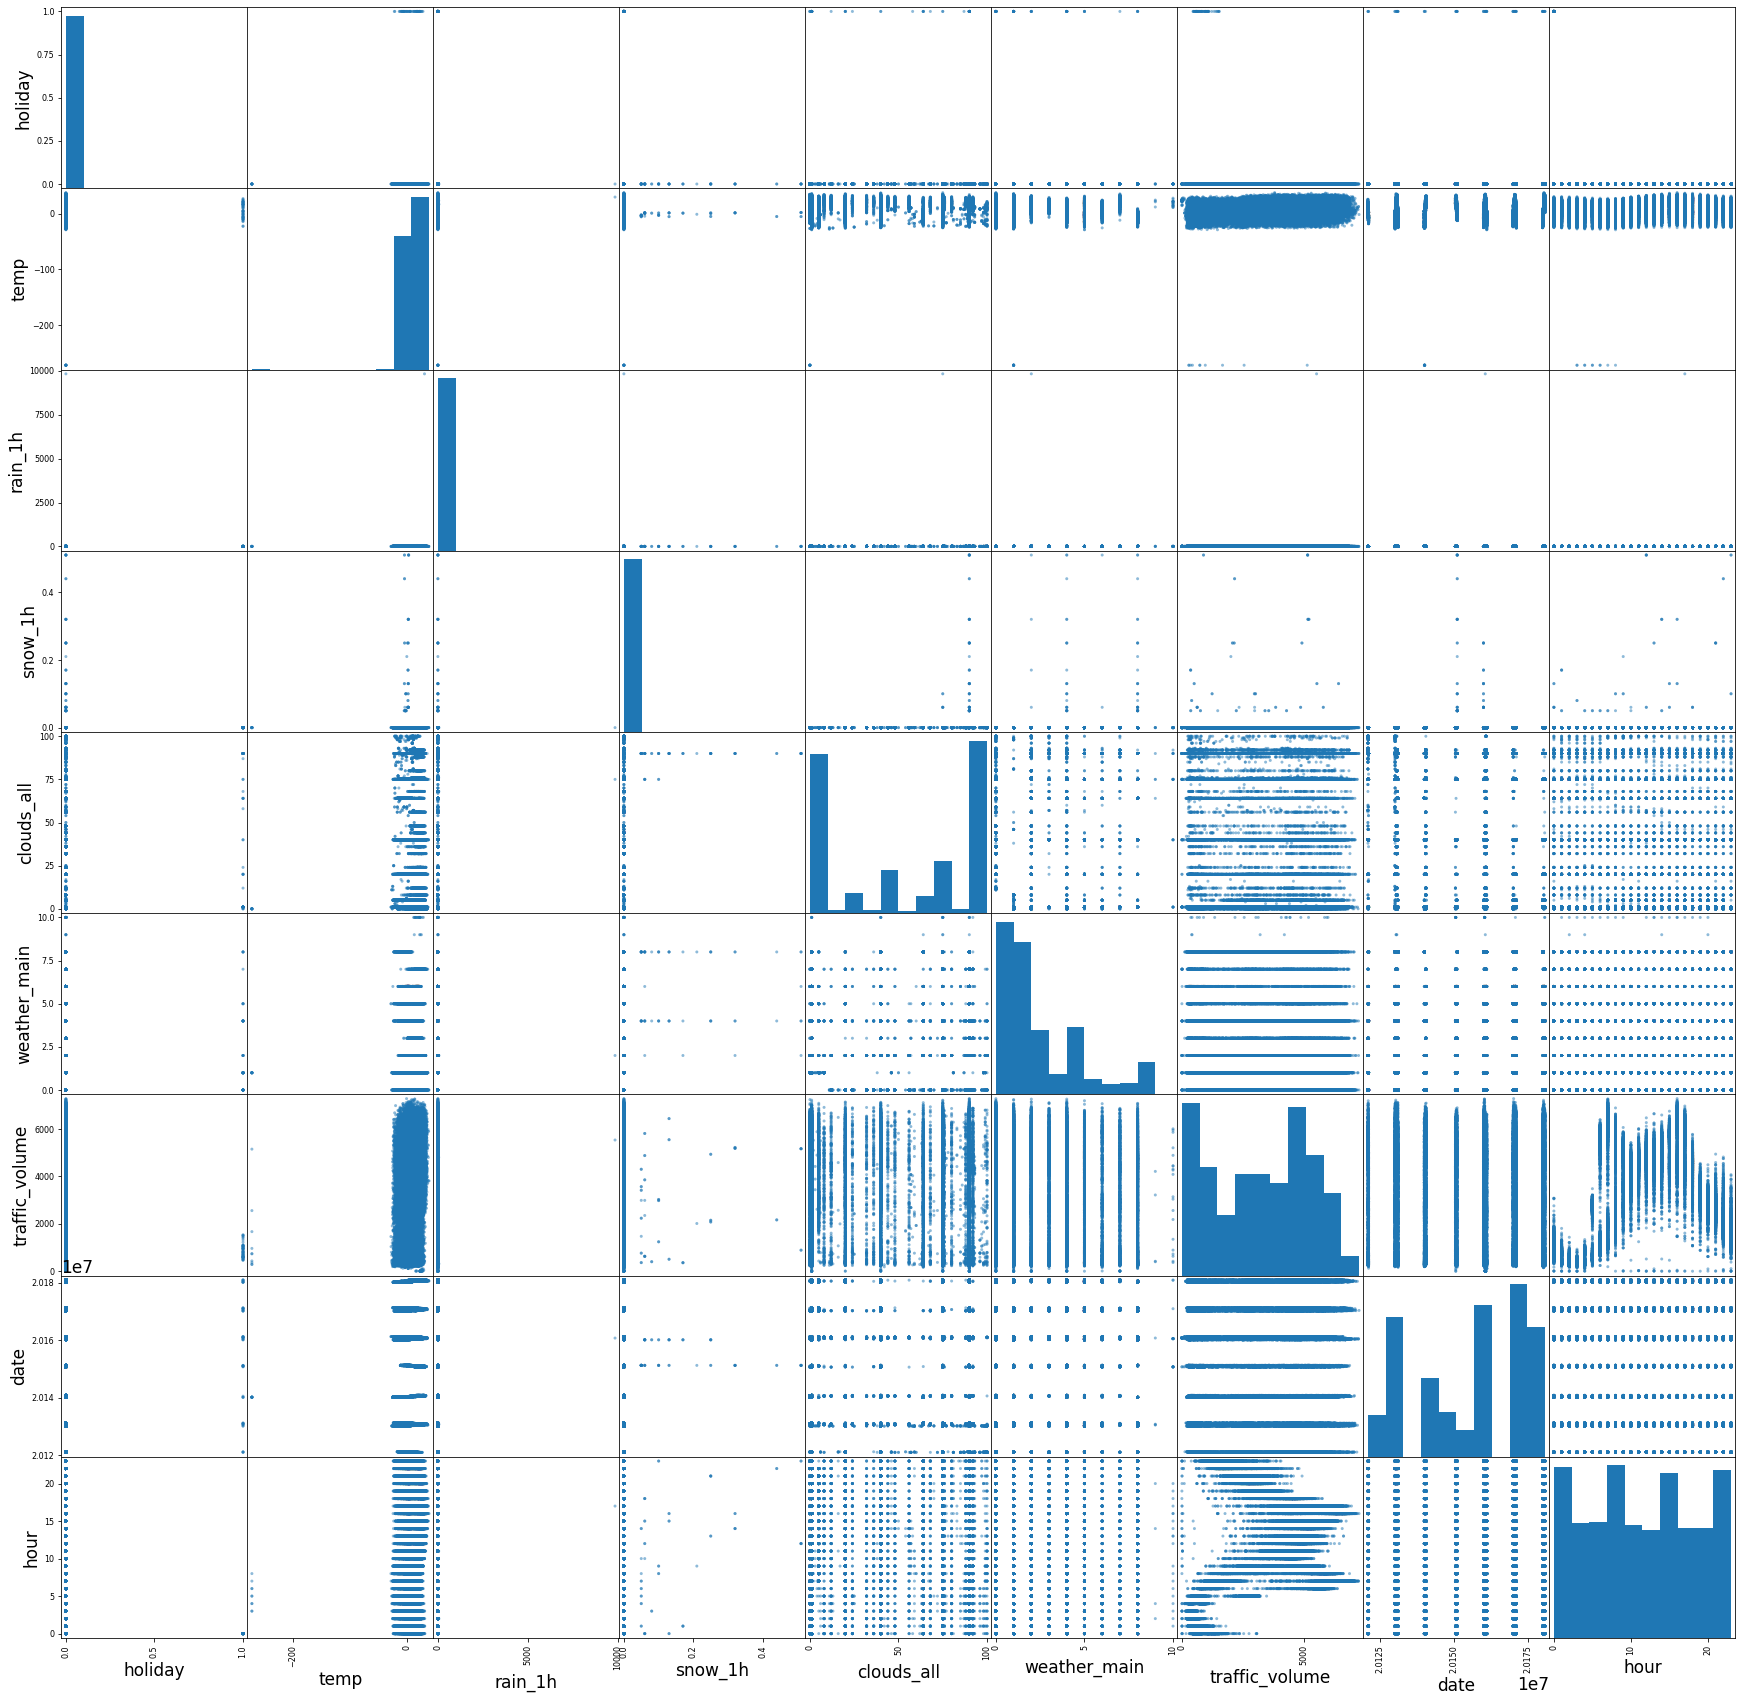

In [214]:
from pandas.plotting import scatter_matrix

plt.rc('xtick', labelsize=17)    # fontsize of the tick labels
plt.rc('ytick', labelsize=17)
plt.rc('axes', titlesize=17)
plt.rc('axes', labelsize=17)
plt.rc('legend', fontsize=17) 
scatter_matrix(metro, figsize=(30,30));

**Hourly traffic during one day**

Text(0.5, 1.0, 'HOURLY TRAFFIC VOLUME')

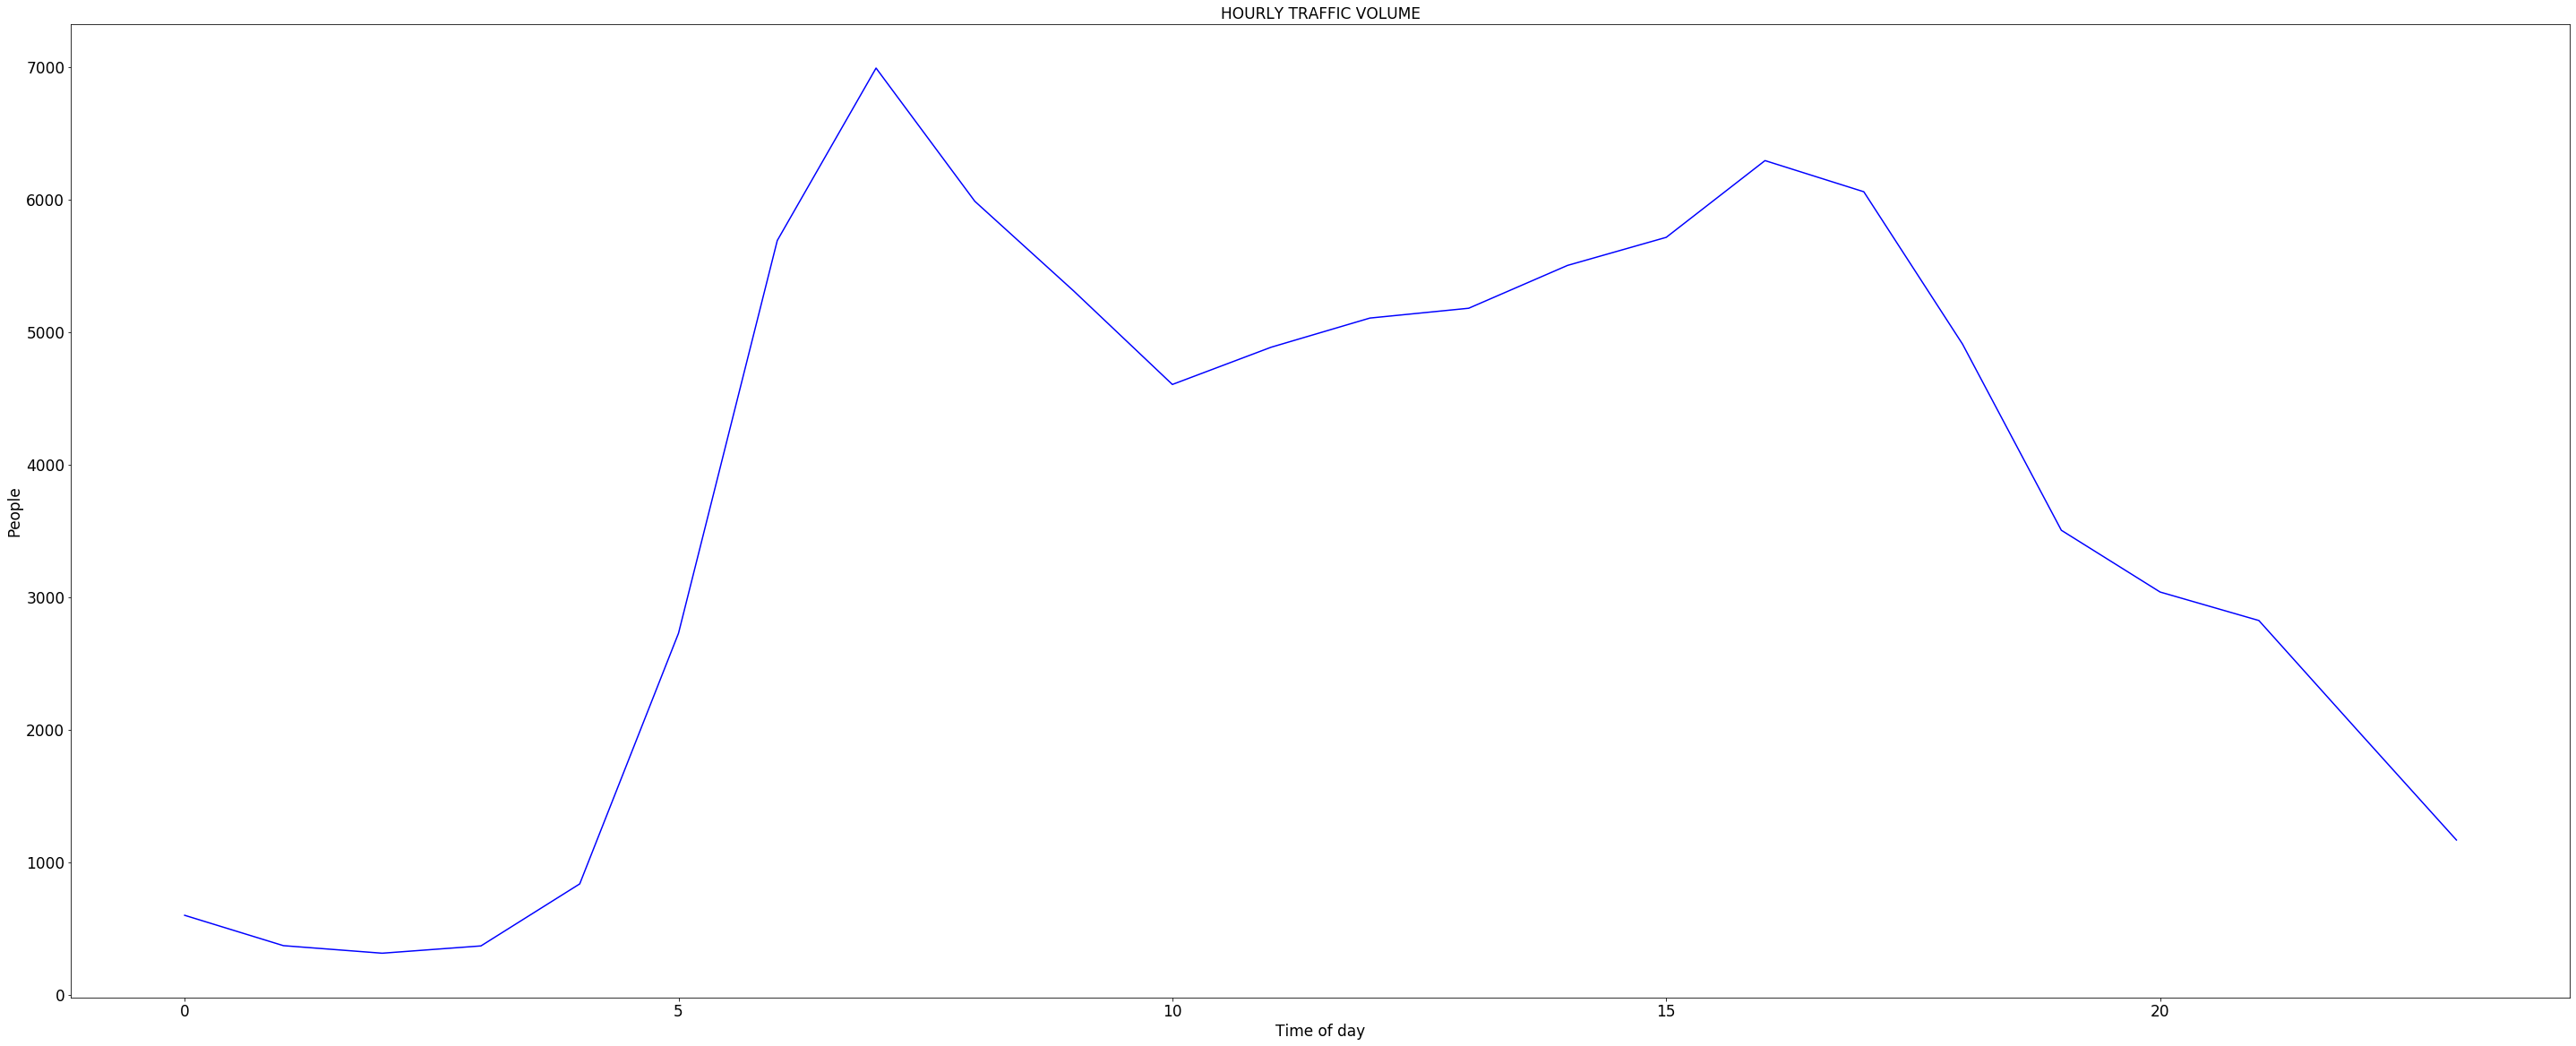

In [215]:
metro_temp = metro.iloc[35:59]

fig, axes = plt.subplots(1, 1, figsize=(50, 20))
axes.plot(day ,metro_temp['traffic_volume'] , 'b')
axes.set_xlabel('Time of day')
axes.set_ylabel('People')
axes.set_title("HOURLY TRAFFIC VOLUME")

**Hourly traffic during one year**

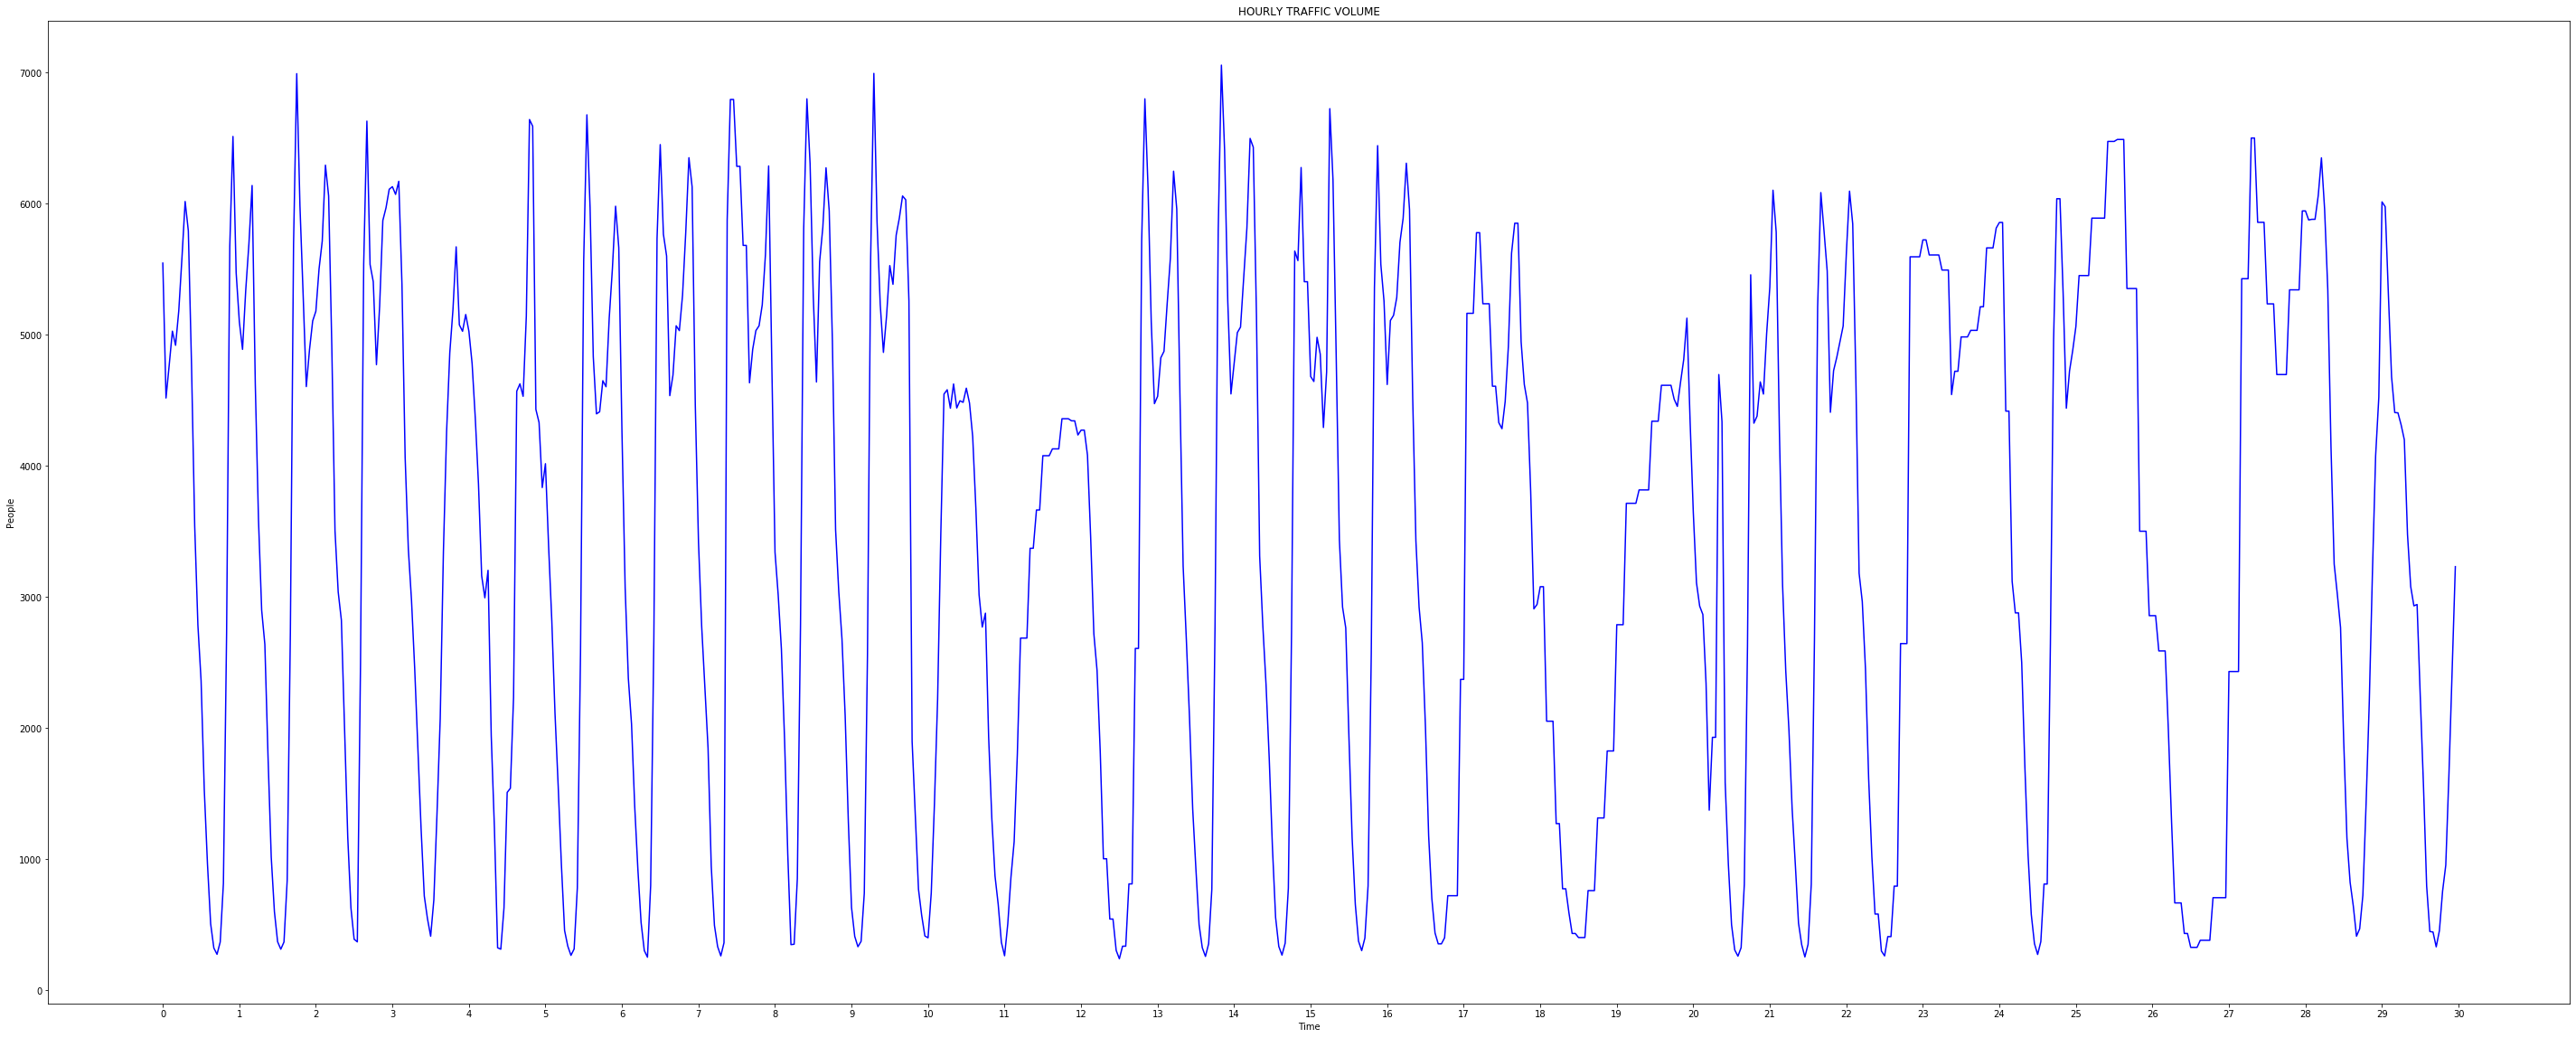

In [10]:
metro_temp = metro.iloc[0:720]
year = range(720)

fig, axes = plt.subplots(1, 1, figsize=(50, 20))
axes.plot(year,metro_temp['traffic_volume'] , 'b')
axes.set_xlabel('Time')
axes.set_ylabel('People')
axes.set_title("HOURLY TRAFFIC VOLUME")

plt.xticks(np.arange(0,721, 24),range(0,31));

**Comparison of hourly traffic between a holiday and non-holiday day during summer**

C:\Users\Thanasis\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


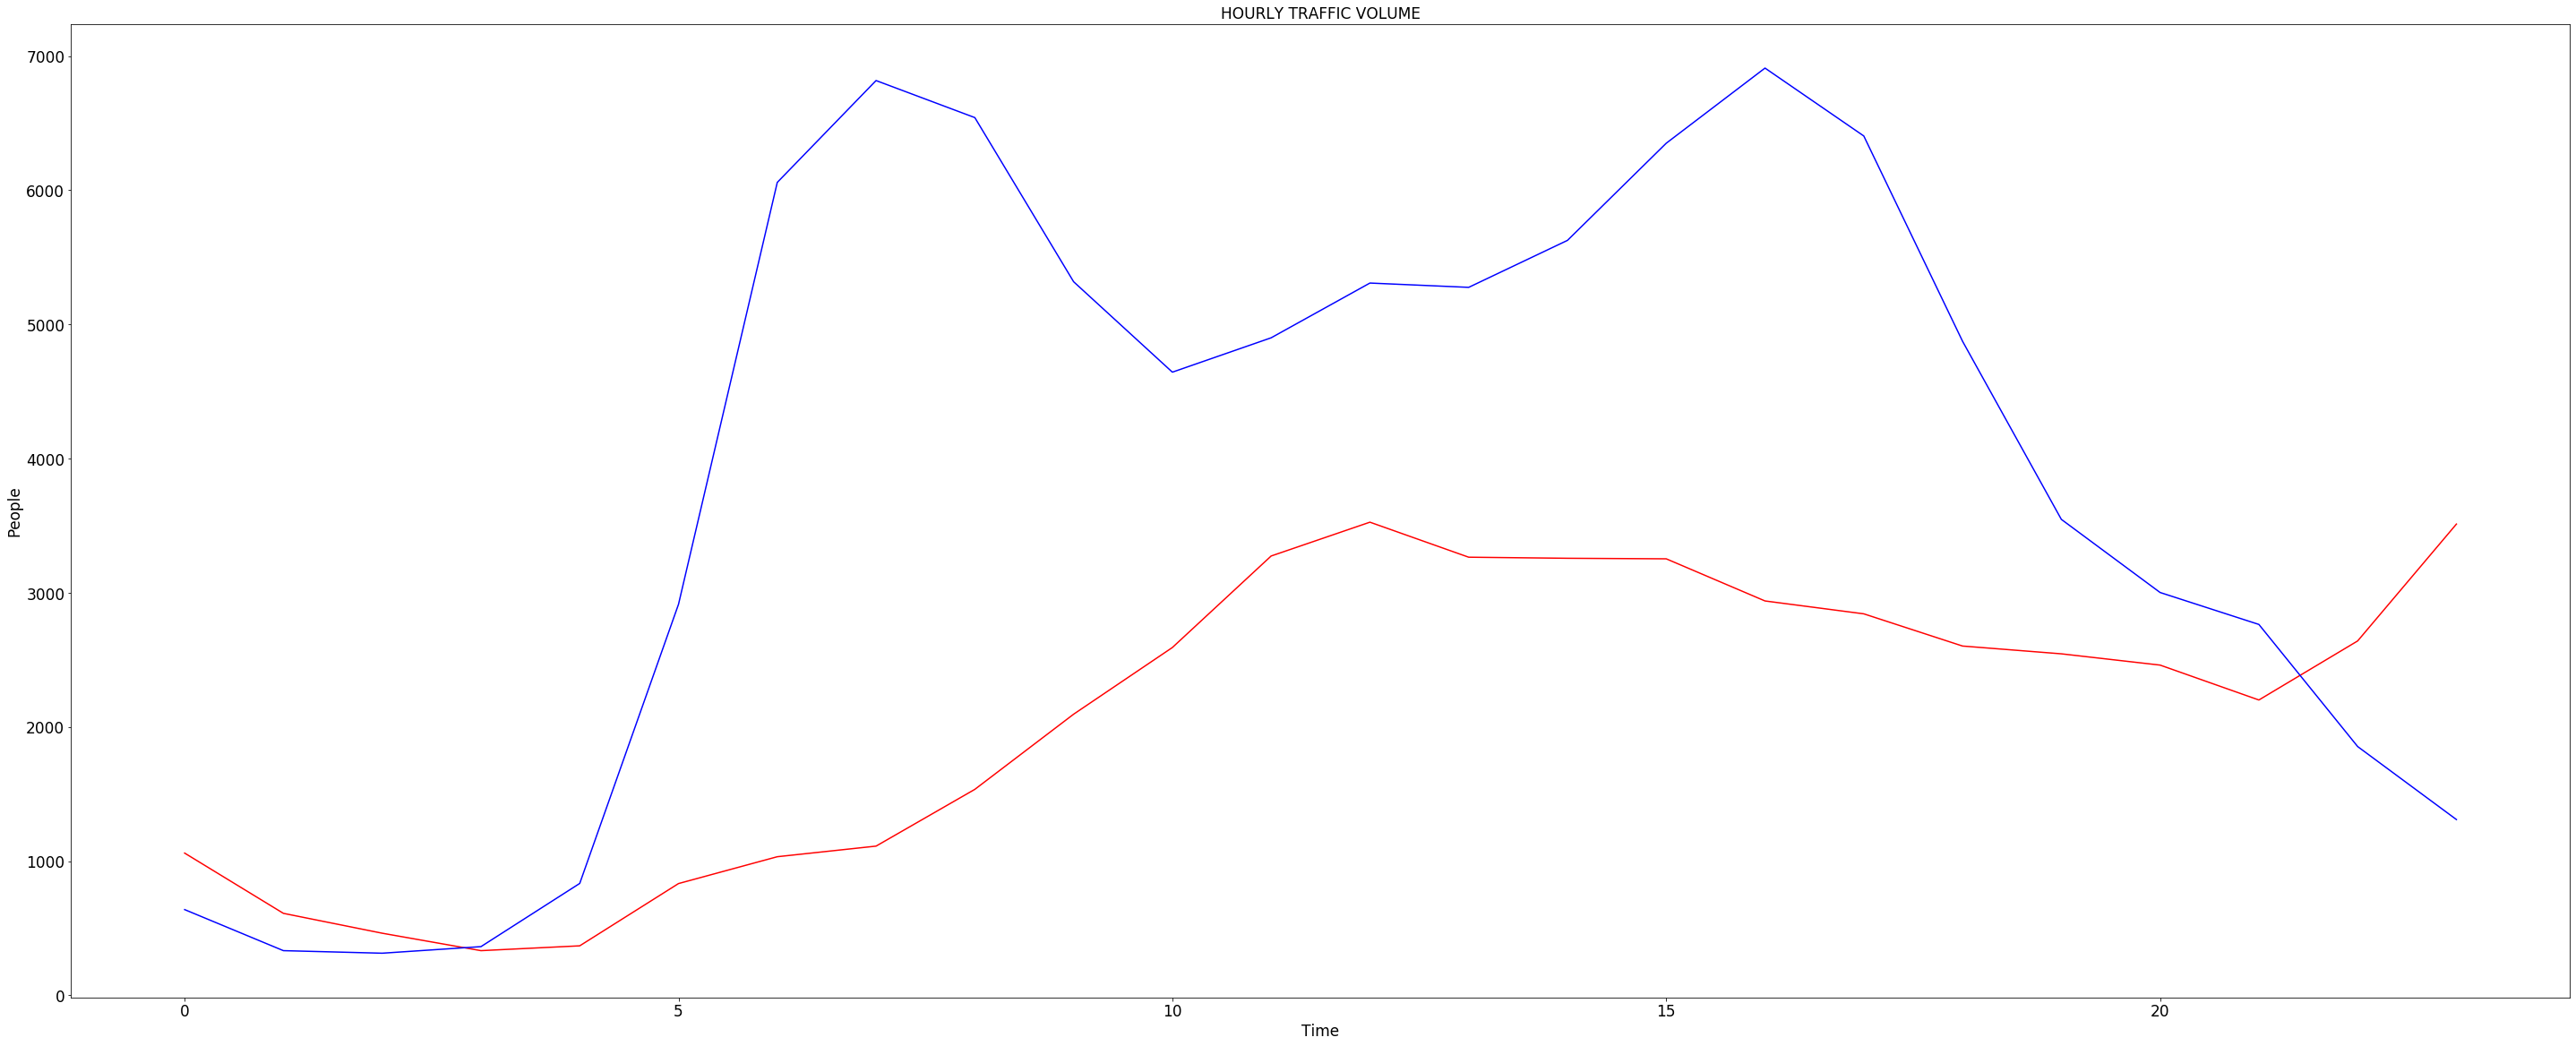

In [217]:
metro_temp2 = metro.iloc[7070:7094]
metro_temp = metro.iloc[7414:7438]

fig, axes = plt.subplots(1, 1, figsize=(50, 20))
axes.plot(day, metro_temp['traffic_volume'] , 'r', label = 'Holiday')
axes.plot(day,metro_temp2['traffic_volume'] , 'b', label = 'Non-holiday')
axes.set_ylabel('People')
axes.set_xlabel('Time')
plt.title("HOURLY TRAFFIC VOLUME")
fig.show()

<h3> Data Split

In [11]:
# split the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(metro, test_size=0.2, random_state=8)

x_train = train[['date', 'holiday', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'temp']]
y_train = train['traffic_volume']

x_test = test[['date', 'holiday', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'temp']]
y_test = test['traffic_volume']

print(y_train)

8753     4134
35238    2038
4068     1343
42969    2422
17198     935
         ... 
10376    2894
34949    4676
18417    4578
25940    2690
4547     5550
Name: traffic_volume, Length: 38563, dtype: int64


<h3> Linear Regression

In [12]:
#try linear regression from statsmodel
 
model = sm.OLS(np.asarray(y_train), np.asarray(sm.add_constant(x_train))).fit()
predictions = model.predict(sm.add_constant(x_test)) 
 
print_model = model.summary()

print(print_model)

C:\Users\ioann\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     194.8
Date:                Wed, 22 Jan 2020   Prob (F-statistic):          4.00e-285
Time:                        01:02:09   Log-Likelihood:            -3.4690e+05
No. Observations:               38563   AIC:                         6.938e+05
Df Residuals:                   38555   BIC:                         6.939e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1516.0803   1.08e+04     -0.140      0.8

Trying again removing some features that are not statistically significant

In [18]:
# split the data
train, test = train_test_split(metro, test_size=0.2, random_state=8)

x_train = train[['hour', 'holiday', 'rain_1h',  'clouds_all', 'weather_main', 'temp']]
y_train = train['traffic_volume']

x_test = test[['hour', 'holiday', 'rain_1h',  'clouds_all', 'weather_main', 'temp']]
y_test = test['traffic_volume']

#try linear regression from statsmodel
 
model = sm.OLS(np.asarray(y_train), np.asarray(sm.add_constant(x_train))).fit()
predictions = model.predict(sm.add_constant(x_test)) 
 
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1053.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        01:06:24   Log-Likelihood:            -3.4464e+05
No. Observations:               38563   AIC:                         6.893e+05
Df Residuals:                   38556   BIC:                         6.894e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1970.2945     23.254     84.729      0.0

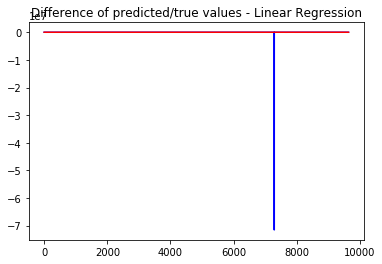

In [21]:
plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Difference of predicted/true values - Linear Regression");

<h3> Polynomial regression

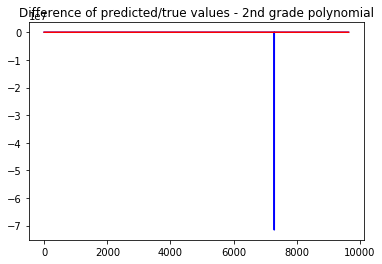

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2) 
  
X_ = poly.fit_transform(x_train)

#transform the prediction to fit the model type
predict_ = poly.fit_transform(x_test)

#here we can remove polynomial orders we don't want
#for instance I'm removing the `x` component
X_ = np.delete(X_,(1),axis=1)
predict_ = np.delete(predict_,(1),axis=1)

#generate the regression object
clf = LinearRegression()
#preform the actual regression
clf.fit(X_, y_train)

predictions = clf.predict(predict_)
plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Difference of predicted/true values - 2nd grade polynomial");

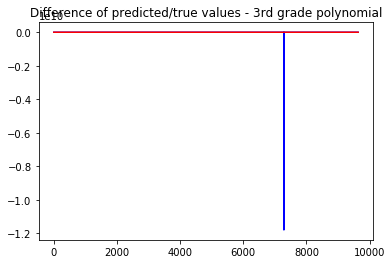

In [23]:
poly = PolynomialFeatures(degree = 3) 
  
X_ = poly.fit_transform(x_train)

#transform the prediction to fit the model type
predict_ = poly.fit_transform(x_test)

#here we can remove polynomial orders we don't want
#for instance I'm removing the `x` component
X_ = np.delete(X_,(1),axis=1)
predict_ = np.delete(predict_,(1),axis=1)

#generate the regression object
clf = LinearRegression()
#preform the actual regression
clf.fit(X_, y_train)

predictions = clf.predict(predict_)
plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Difference of predicted/true values - 3rd grade polynomial");

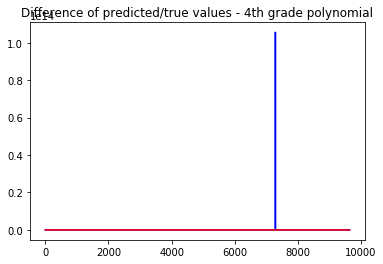

In [24]:
poly = PolynomialFeatures(degree = 4) 
  
X_ = poly.fit_transform(x_train)

#transform the prediction to fit the model type
predict_ = poly.fit_transform(x_test)

#here we can remove polynomial orders we don't want
#for instance I'm removing the `x` component
X_ = np.delete(X_,(1),axis=1)
predict_ = np.delete(predict_,(1),axis=1)

#generate the regression object
clf = LinearRegression()
#preform the actual regression
clf.fit(X_, y_train)

predictions = clf.predict(predict_)
plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Difference of predicted/true values - 4th grade polynomial");

<h3> Non-parametric Regression (Decision Tree, Random Forest, k-Means)

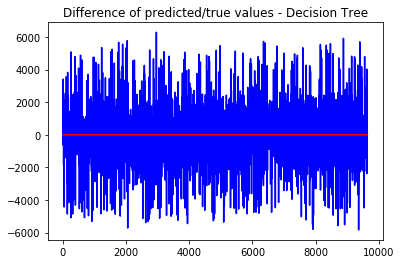

In [25]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor()
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)

plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b' , range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Difference of predicted/true values - Decision Tree");

C:\Users\ioann\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


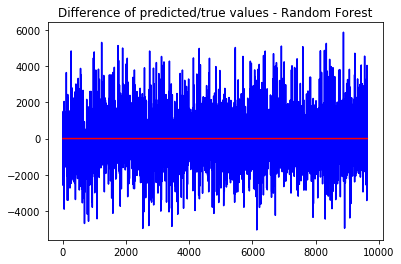

In [26]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)

plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Difference of predicted/true values - Random Forest");

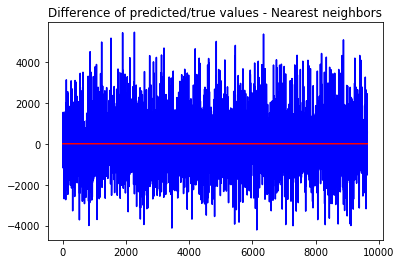

In [27]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(x_train, y_train)

predictions = neigh.predict(x_test)
plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Difference of predicted/true values - Nearest neighbors");

change the model to make it a classification problem

In [32]:
from sklearn.model_selection import train_test_split
mo = metro['traffic_volume'].mean()
metro['y'] = [1 if x >= mo else 0 for x in metro['traffic_volume']]
train, test = train_test_split(metro, test_size=0.2, random_state=8)

x_train = train[['date', 'holiday', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'temp']]
y_train = train['y']

x_test = test[['date', 'holiday', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'temp']]
y_test = test['y']

print(y_train)

8753     1
35238    0
4068     0
42969    0
17198    0
        ..
10376    0
34949    1
18417    1
25940    0
4547     1
Name: y, Length: 38563, dtype: int64


In [36]:
from sklearn.linear_model import LogisticRegression
print("\n---------------------------------------------------------------------------------\n")
fitted_lr = LogisticRegression(C=1e7 ,solver='newton-cg', multi_class= 'ovr', max_iter = 1000000)
fitted_lr= fitted_lr.fit(x_train, y_train)
print("Parameters with sklearn fit:\n{}".format(fitted_lr.coef_))

print("const with sklearn fit:\n{}".format(fitted_lr.intercept_))
print("\n---------------------------------------------------------------------------------\n")


---------------------------------------------------------------------------------

Parameters with sklearn fit:
[[ 8.94995912e-07 -9.02632046e+00 -6.92656671e-02  8.56241444e-01
   5.54580514e-03 -7.34564846e-02  1.96902421e-02]]
const with sklearn fit:
[-18.28394531]

---------------------------------------------------------------------------------



In [37]:
fitted_lr.score(x_train, y_train)

0.5711692555039805

In [38]:
fitted_lr.score(x_test, y_test)

0.5684057670366145

In [39]:
from sklearn.metrics import confusion_matrix

y_pred = fitted_lr.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[2151, 2461],
       [1700, 3329]], dtype=int64)

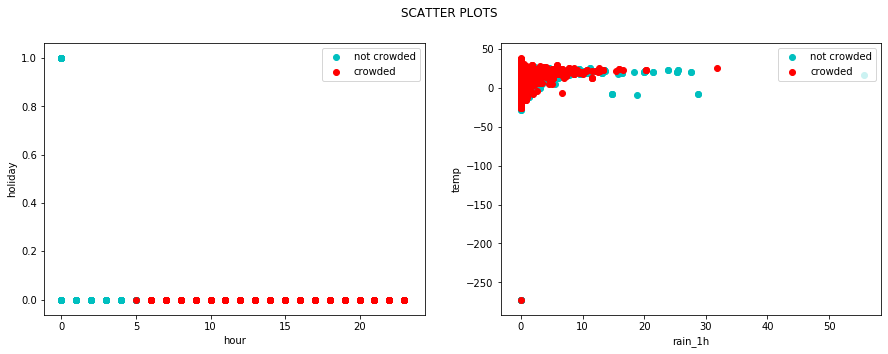

In [41]:
colors = ['c','r']
label_text = ["not crowded" ,"crowded"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for cur_colour in [0, 1]:
    cur_df = train[train['y'] == cur_colour]
    axes[0].scatter(cur_df['hour'], cur_df['holiday'], c = colors[cur_colour], label=label_text[cur_colour])
    
for cur_colour in [0, 1]:
    cur_df = train[train['y'] == cur_colour]
    axes[1].scatter(cur_df['rain_1h'], cur_df['temp'], c = colors[cur_colour], label=label_text[cur_colour])
fig.suptitle("SCATTER PLOTS")
axes[0].set(xlabel="hour", ylabel="holiday")
axes[1].set(xlabel="rain_1h", ylabel="temp")
axes[1].legend(loc=1);
axes[0].legend(loc=1);